## Executive Summary 

Alice Nix

In this project, you will summarize and present your analysis from Projects 1-3. Your goal is to complete your ongoing iPython Notebook, combining prior deliverables from projects 1-3 with an appendix and executive summary. This will be a final overview of your analysis that incorporates past feedback and demonstrates your approach.

Goal: Write up an executive summary that outlines your findings and the methods used in projects 1-3.

### Specific Aim

Answer:  To determine if there is an association between admission to the UCLA graduate school and prestige among prospective students.  Examine the dataset using demographic data collected i.e., (gre, gpa, and prestige or rank).   

Hypothesis:  Students from a high-prestige undergraduate school are more likely to be admitted into the UCLA graduate school compared to students from a low-prestige school.

### Outlined Methods and Models

Answer: There were originally 400 records in our dataset. There were 397 observations or records after missing values were dropped from this dataset.  Dropna() method was used to handle missing values, an alternative method could have been to use fillna() to fill missing values with the mean or median for example.  Predictors included floats as GPA (0.0-4.0), and GRE (200.0-800.0). The ordinal variable, prestige (1= high-prestige, to 4= non-prestige) was coverted to a class variable with high-prestige as the reference category.

Answer:  Fit a logistic regression using Statsmodels module in Python 3.6.2

### Acquisition of Dataset

admissions.csv file but the history of the data collections is not specified by the researchers.

### Risks and Assumptions

Assumptions included the following for the analysis:  1. Outcome must be dichotomous, 2. Independence of observations,  3. No outliers in the data, 4. Linearity of predictors. 

Possible risks or limitations include: 1. Small sample size or dataset, 2. Very few predictors, 3. Time period for when data was collected - unspecified.

### Exploratory Data Analysis Overview - Visualizations and Statistical Analysis

### Graphs


/Users/alicevnix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


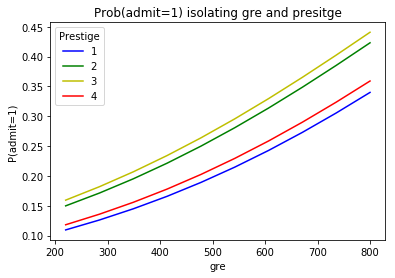

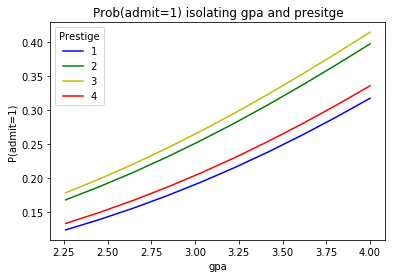

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

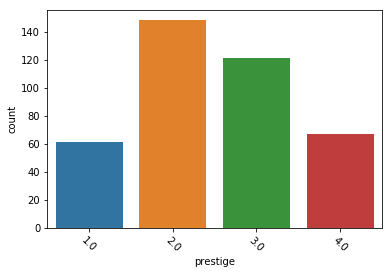

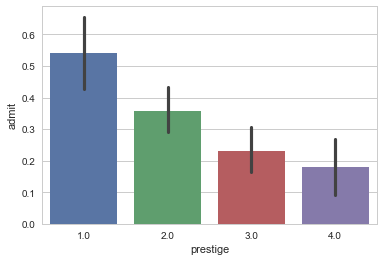

### Descriptive Statistics



| Not Admitted (271) | Admitted (126)
---| ---|---
    GPA | 3.3 (0.38)  | 3.5 (0.37)
GRE |573.6 (116.1) | 618.6 (109.3)
Prestige 1 | 28 (10.3%) | 33 (26.2%)
Prestige 2 | 95 (35.1%) | 53 (42.1%)
Prestige 3 | 93 (34.3%) | 28 (22.2%)
Prestige 4 | 55 (20.3%) | 12 (9.5%)


### Interpretations -  Conclusions and Future Recommendations

Answer:  After controlling for predictors in the logistic regression model,  prospective students from a good-prestige undergraduate school are about 0.50 (CI 0.27, 0.94) times as likely to be admitted to UCLA graduate school than prospective students from a high-prestige undergraduate school.  

Answer: This (decreasing) trend continued after controlling for predictors in the logistic regression model, prospective students from a low-prestige undergraduate school are about 0.26 (CI 0.13, 0.51), and non-prestige undergraduate school 0.21(CI 0.09, 0.48) times as likely to be admitted to UCLA graduate school than prospective students from a high-prestige undergraduate school. 

Answer:  Our findings show that attending a prestigious undergraduate school among prospective students is significantly associated with a higher chance of being admitted to UCLA graduate school.  Future studies could examine the possible association between region of the country where prestigious undergraduate studies occurred and admissions.  Or look at declared major or division of study and admissions. 

### Appendices

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

/Users/alicevnix/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read in data from source 

admit = pd.read_csv("../assets/admissions.csv")



In [3]:
admit.head()


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [6]:
# Method to dropping missing values

admits = admit.dropna() 
print (admits.count())


admit       397
gre         397
gpa         397
prestige    397
dtype: int64


In [ ]:
# Count Plot (Bar Plot)
sns.countplot(x='prestige', data=admits)
 
# Rotate x-labels
plt.xticks(rotation=-45)


In [ ]:
# Bar plot 
sns.set(style="whitegrid")

sns.barplot(x="prestige", y="admit", data=admits);

In [5]:
# Frequency tables - categorical 

pd.crosstab(admits['admit'], admits['prestige'])
                           


prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


In [13]:
admits['admit'].value_counts()


0    271
1    126
Name: admit, dtype: int64

In [10]:
admits['prestige'].value_counts()


2.0    148
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

In [30]:
# Calculating proportions

not_admits = admits['admit'].value_counts()[0] # first value of the result above
admited = admits['admit'].value_counts()[1] # second value of the result above
admissions = not_admits + admited # total count of admits
print (float (admited) / admissions) # converting to float to get a float result

0.317380352645


In [6]:
# Using the 'copy() method'

admit_new = admits.copy()


In [7]:
admit_two = admits.copy()


In [41]:
# 'Groupby method()'


admits.groupby('admit')['gre'].mean()


admit
0    573.579336
1    618.571429
Name: gre, dtype: float64

In [48]:
admits.groupby('admit')['gre'].std()


admit
0    116.052798
1    109.257233
Name: gre, dtype: float64

In [45]:
admits.groupby('admit')['gpa'].mean()


admit
0    3.347159
1    3.489206
Name: gpa, dtype: float64

In [47]:
admits.groupby('admit')['gpa'].std()


admit
0    0.376355
1    0.371655
Name: gpa, dtype: float64

In [ ]:
# 'Aggregated groupby method()'

admit_new.groupby('admit').loc[:,['gre','gpa']].agg('mean','std')


In [19]:
# Alternative method
# Subsetting data using criteria for new_admit equals 0 - stratified analysis

admit_new[admit_new.admit == 0].mean()



admit         0.000000
gre         573.579336
gpa           3.347159
prestige      2.645756
dtype: float64

In [21]:
admit_new[admit_new.admit == 0].std()


admit         0.000000
gre         116.052798
gpa           0.376355
prestige      0.918922
dtype: float64

In [11]:
admit_new[admit_new.admit == 0].count()


admit       271
gre         271
gpa         271
prestige    271
dtype: int64

In [27]:
# Subsetting data using criteria for admit_two equals 1 - stratified analysis

admit_two[admit_two.admit == 1].mean()




admit         1.000000
gre         618.571429
gpa           3.489206
prestige      2.150794
dtype: float64

In [28]:
admit_two[admit_two.admit == 1].std()



admit         0.000000
gre         109.257233
gpa           0.371655
prestige      0.921455
dtype: float64

In [10]:
admit_two[admit_two.admit == 1].count()


admit       126
gre         126
gpa         126
prestige    126
dtype: int64

In [13]:
admits.groupby(['admit', 'prestige'])['gre'].mean()
               

admit  prestige
0      1.0         582.857143
       2.0         588.000000
       3.0         562.365591
       4.0         562.909091
1      1.0         636.363636
       2.0         612.075472
       3.0         616.428571
       4.0         603.333333
Name: gre, dtype: float64

In [14]:
# Selecting a column or subset of columns and performing aggregation functions

admits.groupby(['admit', 'prestige'])['gpa'].mean()


admit  prestige
0      1.0         3.345714
       2.0         3.325895
       3.0         3.402258
       4.0         3.291455
1      1.0         3.544242
       2.0         3.441698
       3.0         3.534643
       4.0         3.441667
Name: gpa, dtype: float64

In [22]:
grouped = admits.groupby(['admit', 'prestige'])

functions = ['count', 'mean', 'std']
results = grouped['gpa', 'gre'].agg(functions)


In [23]:
results

gpa                       gre                        
               count      mean       std count        mean         std
admit prestige                                                        
0     1.0         28  3.345714  0.375445    28  582.857143  126.574737
      2.0         95  3.325895  0.376339    95  588.000000  103.323495
      3.0         93  3.402258  0.379434    93  562.365591  124.650798
      4.0         55  3.291455  0.369767    55  562.909091  116.327646
1     1.0         33  3.544242  0.385511    33  636.363636  110.618098
      2.0         53  3.441698  0.365054    53  612.075472  113.635018
      3.0         28  3.534643  0.399244    28  616.428571   99.785484
      4.0         12  3.441667  0.297286    12  603.333333  114.680056

In [32]:
functioned = ['count', 'mean', 'std'] 

result = admits.groupby('admit')['gre', 'gpa'].agg(functioned)




In [33]:
result

gre                           gpa                    
      count        mean         std count      mean       std
admit                                                        
0       271  573.579336  116.052798   271  3.347159  0.376355
1       126  618.571429  109.257233   126  3.489206  0.371655